<a href="https://colab.research.google.com/github/Ankush-Gupta04/DL-Assignments-/blob/main/2021232_A1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tarfile

tar_file = "./drive/MyDrive/DL/MNIST_DATASET.tar.xz"
output = "./MNIST"

with tarfile.open(tar_file,'r:xz') as tar:
  tar.extractall(output)

In [4]:
import os
import csv

image_folder_path = './MNIST/MNIST_DATASET/trainingSet/trainingSet/'
csv_file_path = './dataset_train.csv'
data = []

for class_label in os.listdir(image_folder_path):
    class_path = os.path.join(image_folder_path, class_label)

    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, image_file)
                data.append([image_path, class_label])

with open(csv_file_path, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['path', 'label'])
    csv_writer.writerows(data)

print(f"CSV file created at: {csv_file_path}")


CSV file created at: ./dataset_train.csv


In [5]:
import os
import csv

image_folder_path = './MNIST/MNIST_DATASET/testSet/'
csv_file_path = './dataset_test.csv'
data = []

for class_label in os.listdir(image_folder_path):
    class_path = os.path.join(image_folder_path, class_label)

    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(class_path, image_file)
                data.append([image_path, class_label])

with open(csv_file_path, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['path', 'label'])
    csv_writer.writerows(data)

print(f"CSV file created at: {csv_file_path}")

CSV file created at: ./dataset_test.csv


In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import os
import time
import pandas as pd

class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.path_frame = csv_file
        self.transform = transform
        self.classes = [str(i) for i in range(0,10)]

    def __len__(self):
        return len(self.path_frame)

    def __getitem__(self, index):
      image_path = self.path_frame['path'][index]
      label = self.path_frame['label'][index]

      transform = transforms.Compose([transforms.ToTensor()])
      image = Image.open(image_path)
      tensor = transform(image)
      return tensor, label


mnist_test= CustomDataset(pd.read_csv("./dataset_test.csv"))
mnist_train= CustomDataset(pd.read_csv("./dataset_train.csv"))

batch_size = 128
shuffle = False
num_workers = 0

start_time = time.time()
mnist_train_c = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)
mnist_test_c = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)

for train_data, label in mnist_test_c:
  pass

for test_data, label in mnist_train_c:
  pass

end_time = time.time()

time_t_128 = end_time - start_time
print(f"Time taken to create DataLoader: {time_t_128} seconds")

Time taken to create DataLoader: 26.71591544151306 seconds


In [7]:
batch_size = 256
shuffle = False
num_workers = 0

start_time = time.time()
mnist_train_c = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)
mnist_test_c = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)

for train_data, label in mnist_test_c:
  pass

for test_data, label in mnist_train_c:
  pass

end_time = time.time()

time_t_256 = end_time - start_time
print(f"Time taken to create DataLoader: {time_t_256} seconds")

Time taken to create DataLoader: 23.959740161895752 seconds


In [8]:
batch_size = 512
shuffle = False
num_workers = 0

start_time = time.time()
mnist_train_c = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)
mnist_test_c = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)

for train_data, label in mnist_test_c:
  pass

for test_data, label in mnist_train_c:
  pass

end_time = time.time()

time_t_512 = end_time - start_time
print(f"Time taken to create DataLoader: {time_t_512} seconds")

Time taken to create DataLoader: 24.416155338287354 seconds


In [9]:
batch_size = 1024
shuffle = False
num_workers = 0

start_time = time.time()
mnist_train_c = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)
mnist_test_c = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=shuffle,num_workers=num_workers)

for train_data, label in mnist_test_c:
  pass

for test_data, label in mnist_train_c:
  pass

end_time = time.time()

time_t_1024 = end_time - start_time
print(f"Time taken to create DataLoader: {time_t_1024} seconds")

Time taken to create DataLoader: 23.7719144821167 seconds


In [21]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
from torchvision import transforms
import os
import time
import pandas as pd
from sklearn.utils import shuffle

class CustomDataset(Dataset):
  def __init__(self, csv_file, transform=None):
    self.path_frame = csv_file
    self.transform = transform
    self.classes = [str(i) for i in range(0,10)]

  def __len__(self):
    return len(self.path_frame)

  def __getitem__(self, index):
    image_path = self.path_frame['path'][index]
    label = self.path_frame['label'][index]

    if self.transform:
          image = self.transform(image_path)
    return image, label

class ToTensor:
  def __call__(self, img):
    if img is None:
      return
    img_np = np.array(img)
    img_np = img_np / 255.0
    img_np = np.transpose(img_np, (2, 0, 1))
    img_np = img_np.astype(np.float32)
    return img_np

class Compose:
  def __init__(self, transforms):
    self.transforms = transforms

  def __call__(self, img):
    for transform in self.transforms:
      img = transform(img)
    return img

class Resize:
  def __init__(self, size):
    self.size = size

  def __call__(self, img):
    if isinstance(img, Image.Image):
      return img.resize(self.size)
    elif isinstance(img, np.ndarray):
      pil_img = Image.fromarray(np.uint8(img * 255.0))
      return pil_img.resize(self.size)


class CustomDataLoader:
  def __init__(self, dataset, batch_size, shuffle=True):
    self.dataset = dataset
    self.batch_size = batch_size
    self.shuffle_data = shuffle
    self.current_index = 0

    if shuffle:
      self.dataset = shuffle(self.dataset)

  def __iter__(self):
    return self

  def __next__(self):
    if self.current_index >= len(self.dataset):
      self.current_index = 0  # Reset the index for the next epoch
      raise StopIteration

    batch = self.dataset[self.current_index:self.current_index + self.batch_size]
    self.current_index += self.batch_size

    return batch




transform = Compose([Resize((256)), ToTensor()])


mnist_test_a= CustomDataset(pd.read_csv("./dataset_test.csv"),transform=transform)
mnist_train_a= CustomDataset(pd.read_csv("./dataset_train.csv"),transform=transform)

batch_size = 256
shuffle = False

start_time = time.time()
mnist_train_dlc = CustomDataLoader(dataset=mnist_train_a, batch_size=batch_size, shuffle=shuffle)
mnist_test_dlc = CustomDataLoader(dataset=mnist_test_a, batch_size=batch_size, shuffle=shuffle)

num_epoch = len(mnist_test_a)
print (num_epoch)

for epoch in range(num_epoch):
  for batch in mnist_train_dlc:
    pass

num_epoch = len(mnist_train_a)
for epoch in range(num_epoch):
  for batch in mnist_test_dlc :
    pass
end_time = time.time()

time_a_256 = end_time - start_time
print(f"Time taken to create DataLoader: {time_a_256} seconds")

28000
Time taken to create DataLoader: 807.6195809841156 seconds


In [23]:
batch_size = 512
shuffle = False

start_time = time.time()
mnist_train_dlc = CustomDataLoader(dataset=mnist_train_a, batch_size=batch_size, shuffle=shuffle)
mnist_test_dlc = CustomDataLoader(dataset=mnist_test_a, batch_size=batch_size, shuffle=shuffle)

num_epoch = len(mnist_test_a)

for epoch in range(num_epoch):
  for batch in mnist_train_dlc:
    pass

num_epoch = len(mnist_train_a)
for epoch in range(num_epoch):
  for batch in mnist_test_dlc :
    pass
end_time = time.time()

time_a_512 = end_time - start_time
print(f"Time taken to create DataLoader: {time_a_512} seconds")

Time taken to create DataLoader: 421.48416233062744 seconds


In [25]:
batch_size = 128
shuffle = False

start_time = time.time()
mnist_train_dlc = CustomDataLoader(dataset=mnist_train_a, batch_size=batch_size, shuffle=shuffle)
mnist_test_dlc = CustomDataLoader(dataset=mnist_test_a, batch_size=batch_size, shuffle=shuffle)

num_epoch = len(mnist_test_a)

for epoch in range(num_epoch):
  for batch in mnist_train_dlc:
    pass

num_epoch = len(mnist_train_a)
for epoch in range(num_epoch):
  for batch in mnist_test_dlc :
    pass
end_time = time.time()

time_a_128 = end_time - start_time
print(f"Time taken to create DataLoader: {time_a_128} seconds")

Time taken to create DataLoader: 1626.2390701770782 seconds


In [27]:
batch_size = 1024
shuffle = False

start_time = time.time()
mnist_train_dlc = CustomDataLoader(dataset=mnist_train_a, batch_size=batch_size, shuffle=shuffle)
mnist_test_dlc = CustomDataLoader(dataset=mnist_test_a, batch_size=batch_size, shuffle=shuffle)

num_epoch = len(mnist_train_a)

for epoch in range(num_epoch):
  for batch in mnist_train_dlc:
    pass

num_epoch = len(mnist_test_a)
for epoch in range(num_epoch):
  for batch in mnist_test_dlc :
    pass
end_time = time.time()

time_a_1024 = end_time - start_time
print(f"Time taken to create DataLoader: {time_a_1024} seconds")

Time taken to create DataLoader: 245.6577229499817 seconds


26.71591544151306
23.959740161895752
24.416155338287354
23.7719144821167
1626.2390701770782
807.6195809841156
421.48416233062744
245.6577229499817


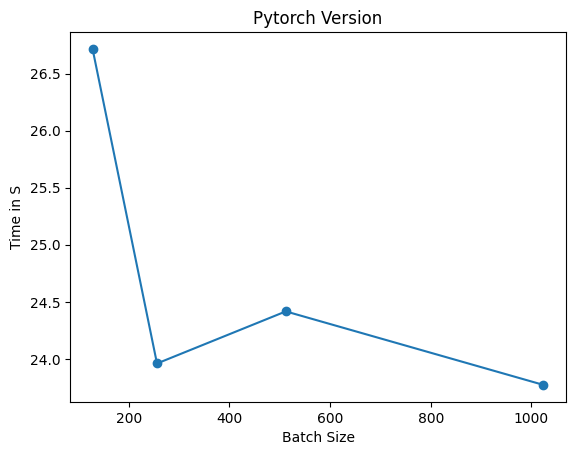

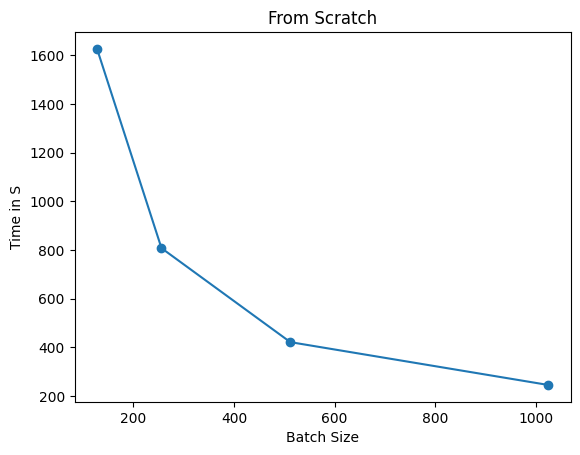

In [31]:
print(time_t_128)
print(time_t_256)
print(time_t_512)
print(time_t_1024)

print(time_a_128)
print(time_a_256)
print(time_a_512)
print(time_a_1024)

import matplotlib.pyplot as plt

y_values = [time_t_128, time_t_256, time_t_512, time_t_1024]
x_values = [128, 256, 512, 1024]

plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.xlabel('Batch Size')
plt.ylabel('Time in S')
plt.title('Pytorch Version')

plt.show()

y_values = [time_a_128, time_a_256, time_a_512, time_a_1024]
x_values = [128, 256, 512, 1024]

plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.xlabel('Batch Size')
plt.ylabel('Time in S')
plt.title('From Scratch')

plt.show()

The most effective data loader is Pytorch Version with batch Size 1024

Epoch [1/60], Training Loss: 2.3034, Training Accuracy: 0.0987, Validation Loss: 2.3027, Validation Accuracy: 0.0980
Epoch [2/60], Training Loss: 2.3019, Training Accuracy: 0.0987, Validation Loss: 2.3011, Validation Accuracy: 0.0980
Epoch [3/60], Training Loss: 2.3004, Training Accuracy: 0.0987, Validation Loss: 2.2995, Validation Accuracy: 0.0980
Epoch [4/60], Training Loss: 2.2987, Training Accuracy: 0.0987, Validation Loss: 2.2977, Validation Accuracy: 0.0980
Epoch [5/60], Training Loss: 2.2968, Training Accuracy: 0.0987, Validation Loss: 2.2956, Validation Accuracy: 0.0980
Epoch [6/60], Training Loss: 2.2946, Training Accuracy: 0.0987, Validation Loss: 2.2931, Validation Accuracy: 0.0980
Epoch [7/60], Training Loss: 2.2919, Training Accuracy: 0.0987, Validation Loss: 2.2901, Validation Accuracy: 0.0980
Epoch [8/60], Training Loss: 2.2888, Training Accuracy: 0.0987, Validation Loss: 2.2867, Validation Accuracy: 0.0980
Epoch [9/60], Training Loss: 2.2854, Training Accuracy: 0.0987, 

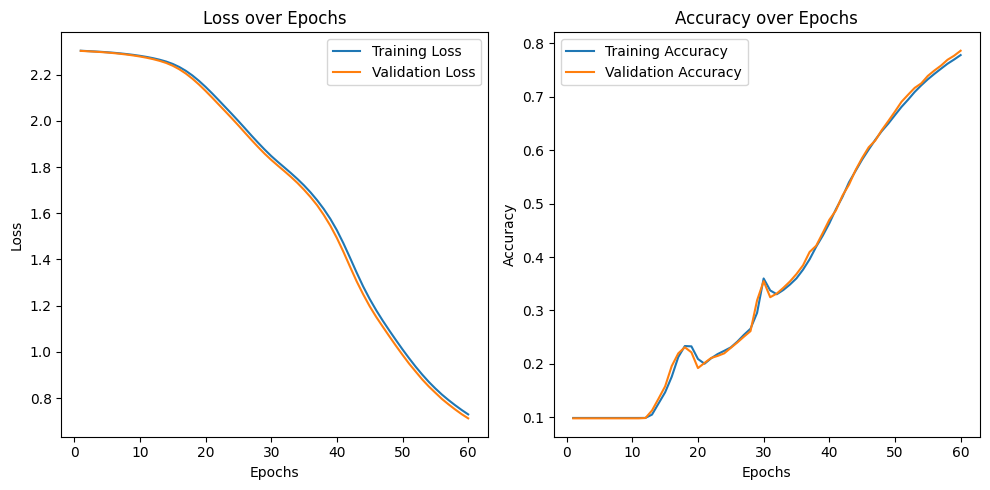

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 10)  # Output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = FFNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
epochs = 60
train_losses, train_acc, val_losses, val_acc = [], [], [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / len(train_dataset)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct_val / len(test_dataset)
    val_losses.append(val_loss)
    val_acc.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch [1/60], Training Loss: 2.3612, Training Accuracy: 0.0986, Validation Loss: 2.3445, Validation Accuracy: 0.0958
Epoch [2/60], Training Loss: 2.3315, Training Accuracy: 0.0986, Validation Loss: 2.3244, Validation Accuracy: 0.0958
Epoch [3/60], Training Loss: 2.3176, Training Accuracy: 0.0986, Validation Loss: 2.3144, Validation Accuracy: 0.0958
Epoch [4/60], Training Loss: 2.3105, Training Accuracy: 0.0986, Validation Loss: 2.3089, Validation Accuracy: 0.0958
Epoch [5/60], Training Loss: 2.3066, Training Accuracy: 0.0986, Validation Loss: 2.3058, Validation Accuracy: 0.0958
Epoch [6/60], Training Loss: 2.3044, Training Accuracy: 0.0986, Validation Loss: 2.3040, Validation Accuracy: 0.0958
Epoch [7/60], Training Loss: 2.3031, Training Accuracy: 0.0986, Validation Loss: 2.3028, Validation Accuracy: 0.0958
Epoch [8/60], Training Loss: 2.3023, Training Accuracy: 0.1000, Validation Loss: 2.3022, Validation Accuracy: 0.1135
Epoch [9/60], Training Loss: 2.3019, Training Accuracy: 0.1124, 

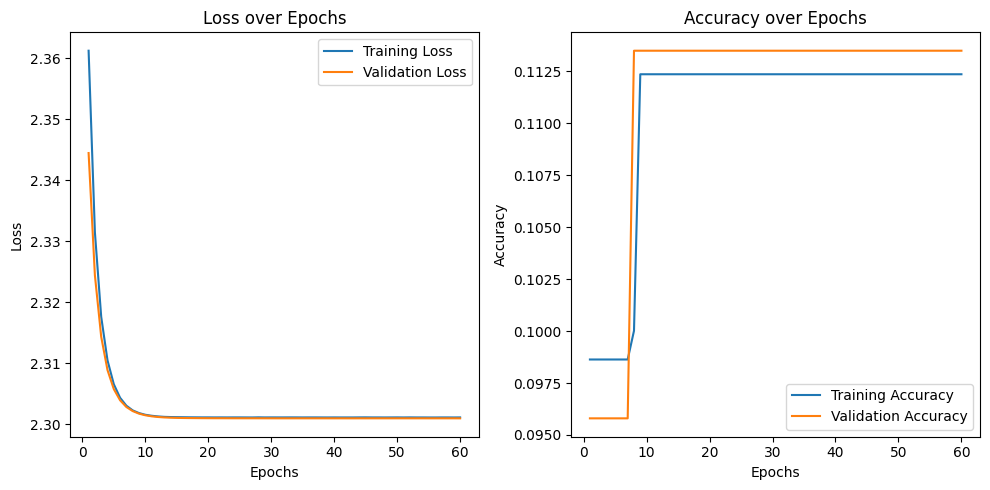

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture
class FFNN(nn.Module):
    def __init__(self):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 10)  # Output layer

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = self.fc5(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = FFNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
epochs = 60
train_losses, train_acc, val_losses, val_acc = [], [], [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / len(train_dataset)
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct_val / len(test_dataset)
    val_losses.append(val_loss)
    val_acc.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
